In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
# 生成数据集
def synthetic_data(w, b, num_examples):  #@save
    """生成y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1, 1)

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
X, y = synthetic_data(true_w, true_b, 1000)

In [15]:
X, y

(tensor([[-0.2411,  1.0041],
         [-1.1881,  0.1733],
         [ 1.9829, -2.9620],
         ...,
         [-0.7111,  1.8805],
         [ 0.1643, -0.6705],
         [-1.1687,  0.5677]]),
 tensor([[ 3.0514e-01],
         [ 1.2410e+00],
         [ 1.8227e+01],
         [ 7.7432e+00],
         [ 5.5977e+00],
         [ 9.7342e-01],
         [ 9.3434e-01],
         [ 9.4290e+00],
         [ 6.8665e+00],
         [ 7.0436e+00],
         [ 6.5174e+00],
         [ 3.0484e+00],
         [ 5.0943e+00],
         [ 1.0161e+00],
         [ 5.5293e+00],
         [ 2.5322e+00],
         [ 5.2930e+00],
         [ 4.3820e+00],
         [ 6.0728e+00],
         [ 3.7705e+00],
         [-5.3335e+00],
         [ 2.7662e+00],
         [ 5.0127e+00],
         [ 3.3403e+00],
         [ 9.0705e+00],
         [-9.6280e-02],
         [ 3.8487e-01],
         [ 1.1940e+00],
         [ 2.8905e+00],
         [ 2.1264e+00],
         [ 9.0541e+00],
         [ 7.7399e+00],
         [ 2.1937e+00],
         [ 7.5497e

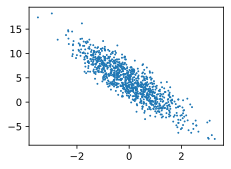

In [4]:
d2l.set_figsize()
d2l.plt.scatter(X[:, (1)].detach().numpy(), y.detach().numpy(), 1)

In [5]:
len(X), len(y)

(1000, 1000)

In [6]:
# 读取数据
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [7]:
# 初始化参数
w = torch.normal(0, 0.01, (2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [8]:
# 定义模型
def linear_regression(X):
    return torch.matmul(X, w) + b

In [9]:
# 定义损失函数
def squaredLoss(y_hat, y):
    return (y_hat - y) ** 2 / 2

In [10]:
# 优化算法
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for p in params:
            p -= lr * p.grad / batch_size
            p.grad.zero_()

In [11]:
lr = 0.01
batch_size = 10
epochs = 10
net = linear_regression
loss = squaredLoss
optimizer = sgd

In [36]:
# 训练模型
for epoch in range(epochs):
    item = 0
    for X_batch, y_batch in data_iter(batch_size=batch_size, features=X, labels=y):
        y_hat = net(X_batch)
        l = loss(y_hat, y_batch)
        l.sum().backward()
        optimizer([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(X), y)
        print(f"epoch {epoch + 1}: loss {train_l.mean():.4f}\n")

epoch 1: loss 0.0000

epoch 2: loss 0.0000

epoch 3: loss 0.0000

epoch 4: loss 0.0000

epoch 5: loss 0.0000

epoch 6: loss 0.0000

epoch 7: loss 0.0000

epoch 8: loss 0.0000

epoch 9: loss 0.0000

epoch 10: loss 0.0000



In [37]:
print(f"w: {w}, b: {b}")
print(f"true_w: {true_w}, true_b: {true_b}")
print(f"error in estimating w: {true_w.reshape(w.shape) - w}")
print(f"error in estimating b: {true_b - b}")

w: tensor([[ 2.0000],
        [-3.3997]], requires_grad=True), b: tensor([4.2000], requires_grad=True)
true_w: tensor([ 2.0000, -3.4000]), true_b: 4.2
error in estimating w: tensor([[ 1.4901e-05],
        [-2.5916e-04]], grad_fn=<SubBackward0>)
error in estimating b: tensor([1.0014e-05], grad_fn=<RsubBackward1>)


In [32]:
M = torch.tensor([[1., 2.],
                  [3., 4.],
                  [5., 6.]])

In [33]:
torch.matmul(M, w), torch.matmul(M, w).shape

(tensor([[ -4.7993],
         [ -7.5985],
         [-10.3978]], grad_fn=<MmBackward0>),
 torch.Size([3, 1]))

In [34]:
torch.matmul(M, true_w), torch.matmul(M, true_w).shape

(tensor([ -4.8000,  -7.6000, -10.4000]), torch.Size([3]))